In [123]:
# import pandas, nltk, and vader
import nltk
import pandas as pd
import os
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [124]:
# load tweets into a dataframe
df = pd.read_json(os.path.join('condensed_2018.json'))

In [125]:
df

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text
0,2018-12-31 23:53:06,136012,1079888205351145472,NaN,False,33548,Twitter for iPhone,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6
1,2018-12-31 20:02:52,65069,1079830268708556800,25073877.0,False,17456,Twitter for iPhone,"....Senator Schumer, more than a year longer t..."
2,2018-12-31 20:02:52,76721,1079830267274108928,NaN,False,21030,Twitter for iPhone,Heads of countries are calling wanting to know...
3,2018-12-31 15:39:15,127485,1079763923845419008,NaN,False,29610,Twitter for iPhone,It’s incredible how Democrats can all use thei...
4,2018-12-31 15:37:14,132439,1079763419908243456,NaN,False,30957,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f..."
5,2018-12-31 15:33:15,4217,1079762413589807104,NaN,False,1123,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f..."
6,2018-12-31 14:38:52,112735,1079748730058870784,NaN,False,25463,Twitter for iPhone,I am the only person in America who could say ...
7,2018-12-31 13:29:32,91523,1079731279032172544,NaN,False,22079,Twitter for iPhone,"I campaigned on Border Security, which you can..."
8,2018-12-31 13:19:13,72758,1079728684427341824,NaN,False,15152,Twitter for iPhone,.....Except the results are FAR BETTER than I ...
9,2018-12-31 13:12:40,101470,1079727034673311744,NaN,False,22119,Twitter for iPhone,...I campaigned on getting out of Syria and ot...


In [126]:
# drop retweets
dfRt = df[~df.text.str.startswith('RT')]

In [127]:
dfRt

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text
0,2018-12-31 23:53:06,136012,1079888205351145472,NaN,False,33548,Twitter for iPhone,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6
1,2018-12-31 20:02:52,65069,1079830268708556800,25073877.0,False,17456,Twitter for iPhone,"....Senator Schumer, more than a year longer t..."
2,2018-12-31 20:02:52,76721,1079830267274108928,NaN,False,21030,Twitter for iPhone,Heads of countries are calling wanting to know...
3,2018-12-31 15:39:15,127485,1079763923845419008,NaN,False,29610,Twitter for iPhone,It’s incredible how Democrats can all use thei...
4,2018-12-31 15:37:14,132439,1079763419908243456,NaN,False,30957,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f..."
5,2018-12-31 15:33:15,4217,1079762413589807104,NaN,False,1123,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f..."
6,2018-12-31 14:38:52,112735,1079748730058870784,NaN,False,25463,Twitter for iPhone,I am the only person in America who could say ...
7,2018-12-31 13:29:32,91523,1079731279032172544,NaN,False,22079,Twitter for iPhone,"I campaigned on Border Security, which you can..."
8,2018-12-31 13:19:13,72758,1079728684427341824,NaN,False,15152,Twitter for iPhone,.....Except the results are FAR BETTER than I ...
9,2018-12-31 13:12:40,101470,1079727034673311744,NaN,False,22119,Twitter for iPhone,...I campaigned on getting out of Syria and ot...


In [128]:

dfRt['created_at'] = pd.to_datetime(dfRt['created_at'])

dfRt['day_of_week'] = dfRt['created_at'].dt.day_name()
dfRt.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,day_of_week
0,2018-12-31 23:53:06,136012,1079888205351145472,NaN,False,33548,Twitter for iPhone,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,Monday
1,2018-12-31 20:02:52,65069,1079830268708556800,25073877.0,False,17456,Twitter for iPhone,"....Senator Schumer, more than a year longer t...",Monday
2,2018-12-31 20:02:52,76721,1079830267274108928,NaN,False,21030,Twitter for iPhone,Heads of countries are calling wanting to know...,Monday
3,2018-12-31 15:39:15,127485,1079763923845419008,NaN,False,29610,Twitter for iPhone,It’s incredible how Democrats can all use thei...,Monday
4,2018-12-31 15:37:14,132439,1079763419908243456,NaN,False,30957,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f...",Monday


In [129]:
Monday_df=dfRt.loc[dfRt['day_of_week'] == "Monday"]
Monday_df


,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,day_of_week
0,2018-12-31 23:53:06,136012,1079888205351145472,NaN,False,33548,Twitter for iPhone,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,Monday
1,2018-12-31 20:02:52,65069,1079830268708556800,25073877.0,False,17456,Twitter for iPhone,"....Senator Schumer, more than a year longer t...",Monday
2,2018-12-31 20:02:52,76721,1079830267274108928,NaN,False,21030,Twitter for iPhone,Heads of countries are calling wanting to know...,Monday
3,2018-12-31 15:39:15,127485,1079763923845419008,NaN,False,29610,Twitter for iPhone,It’s incredible how Democrats can all use thei...,Monday
4,2018-12-31 15:37:14,132439,1079763419908243456,NaN,False,30957,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f...",Monday
5,2018-12-31 15:33:15,4217,1079762413589807104,NaN,False,1123,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f...",Monday
6,2018-12-31 14:38:52,112735,1079748730058870784,NaN,False,25463,Twitter for iPhone,I am the only person in America who could say ...,Monday
7,2018-12-31 13:29:32,91523,1079731279032172544,NaN,False,22079,Twitter for iPhone,"I campaigned on Border Security, which you can...",Monday
8,2018-12-31 13:19:13,72758,1079728684427341824,NaN,False,15152,Twitter for iPhone,.....Except the results are FAR BETTER than I ...,Monday
9,2018-12-31 13:12:40,101470,1079727034673311744,NaN,False,22119,Twitter for iPhone,...I campaigned on getting out of Syria and ot...,Monday


In [130]:
# setting text column to a varible
sentences = Monday_df["text"]

In [131]:
type(sentences)

pandas.core.series.Series

In [132]:
sentences = sentences.to_string()

In [133]:
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)

In [134]:
sid = SentimentIntensityAnalyzer()

In [135]:
#MONDAYS 2018
vScore = []
for sentence in sentences:
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     tCompScores['sentimentScores'] = dfRt['id_str'].map(ss.get('compound'))
#     tCompScores.head()
    score = (ss.get("compound"))
#     how is k working here? How does this format in this manner?
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()
    print (ss)

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6114}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.043, 'neu': 0.88, 'pos': 0.077, 'compound': 0.5647}
{'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.628}
{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.7269}
{'neg': 0.038, 'neu': 0.851, 'pos': 0.111, 'compound': 0.96}
{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.7845}
{'neg': 0.165, 'neu': 0.835, 'pos': 0.0, 'compound': -0.6908}
{'neg': 0.079, 'neu': 0.78, 'pos': 0.141, 'compound': 0.8313}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.094, 'neu': 0.821, 'pos': 0.085, 'compound': -0.1796}
{'neg': 0.134, 'neu': 0.746, 'pos': 0.12, 'compound': -0.2714}
{'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.8087}
{'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.8819}
{'neg': 0.045, 'neu': 0.849, 'pos': 0.106, 'compound': 0.5859}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0

In [136]:
Tuesday_df=dfRt.loc[dfRt['day_of_week'] == "Tuesday"]
Tuesday_df

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,day_of_week
42,2018-12-25 23:18:44,249872,1077705232665272320,NaN,False,46597,Twitter for iPhone,"I hope everyone, even the Fake News Media, is ...",Tuesday
43,2018-12-25 12:59:08,508372,1077549301449060352,NaN,False,89255,Twitter for iPhone,Merry Christmas!,Tuesday
134,2018-12-18 22:42:37,45671,1075159426968027136,NaN,False,10816,Twitter for iPhone,“President Donald J. Trump’s Commission on Sch...,Tuesday
137,2018-12-18 13:32:34,82019,1075021002441220096,NaN,False,21238,Twitter for iPhone,Michael Isikoff was the first to report Dossie...,Tuesday
138,2018-12-18 13:22:29,75842,1075018465356996608,NaN,False,19460,Twitter for iPhone,....WILL NEVER BE PROVEN AND ARE LIKELY FALSE....,Tuesday
139,2018-12-18 13:14:40,57018,1075016498987573248,NaN,False,14488,Twitter for iPhone,Russia Dossier reporter now doubts dopey Chris...,Tuesday
140,2018-12-18 12:55:48,92263,1075011751165485056,NaN,False,24894,Twitter for iPhone,Illegal immigration costs the United States mo...,Tuesday
141,2018-12-18 12:26:18,96334,1075004324567285760,NaN,False,26345,Twitter for iPhone,"Facebook, Twitter and Google are so biased tow...",Tuesday
142,2018-12-18 12:13:24,70330,1075001077576151040,NaN,False,16500,Twitter for iPhone,I hope the people over at the Fed will read to...,Tuesday
143,2018-12-18 11:41:27,77887,1074993036831191040,NaN,False,18557,Twitter for iPhone,Good luck today in court to General Michael Fl...,Tuesday


In [137]:
# setting text column to a varible
sentences = Tuesday_df["text"]
sentences = sentences.to_string()
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)
sid = SentimentIntensityAnalyzer()
#TUESDAYS 2018
vScore = []
for sentence in sentences:
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     tCompScores['sentimentScores'] = dfRt['id_str'].map(ss.get('compound'))
#     tCompScores.head()
    score = (ss.get("compound"))
#     how is k working here? How does this format in this manner?
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()
    print (ss)

{'neg': 0.157, 'neu': 0.505, 'pos': 0.338, 'compound': 0.5562}
{'neg': 0.135, 'neu': 0.699, 'pos': 0.167, 'compound': 0.6874}
{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.6249}
{'neg': 0.035, 'neu': 0.965, 'pos': 0.0, 'compound': -0.34}
{'neg': 0.0, 'neu': 0.646, 'pos': 0.354, 'compound': 0.9382}
{'neg': 0.0, 'neu': 0.907, 'pos': 0.093, 'compound': 0.5719}
{'neg': 0.166, 'neu': 0.834, 'pos': 0.0, 'compound': -0.5256}
{'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'compound': -0.5106}
{'neg': 0.085, 'neu': 0.683, 'pos': 0.232, 'compound': 0.9688}
{'neg': 0.0, 'neu': 0.835, 'pos': 0.165, 'compound': 0.729}
{'neg': 0.056, 'neu': 0.819, 'pos': 0.125, 'compound': 0.6994}
{'neg': 0.0, 'neu': 0.831, 'pos': 0.169, 'compound': 0.9001}
{'neg': 0.043, 'neu': 0.784, 'pos': 0.172, 'compound': 0.7644}
{'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'compound': -0.4019}
{'neg': 0.02, 'neu': 0.858, 'pos': 0.122, 'compound': 0.802}
{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.1531}
{'neg': 0.0, 

In [138]:
Wednesday_df=dfRt.loc[dfRt['day_of_week'] == "Wednesday"]
Wednesday_df

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,day_of_week
41,2018-12-26 20:35:25,222929,1078026520021544960,NaN,False,50449,Twitter for iPhone,.@FLOTUS Melania and I were honored to visit o...,Wednesday
121,2018-12-19 23:10:35,118571,1075528854402256896,NaN,False,29396,Twitter Media Studio,"After historic victories against ISIS, it’s ti...",Wednesday
122,2018-12-19 15:05:29,72633,1075406772368785408,NaN,False,17280,Twitter for iPhone,"....In any event, it goes on and on &amp; the ...",Wednesday
123,2018-12-19 14:56:11,80635,1075404434862235648,NaN,False,20672,Twitter for iPhone,"...sleazebag AG Eric Schneiderman, who has sin...",Wednesday
124,2018-12-19 14:44:42,65794,1075401544131076096,NaN,False,16282,Twitter for iPhone,The Trump Foundation has done great work and g...,Wednesday
125,2018-12-19 14:29:49,116733,1075397797929775104,NaN,False,25524,Twitter for iPhone,"We have defeated ISIS in Syria, my only reason...",Wednesday
126,2018-12-19 13:43:10,98828,1075386058282545152,NaN,False,23954,Twitter for iPhone,Mexico is paying (indirectly) for the Wall thr...,Wednesday
127,2018-12-19 12:35:04,109676,1075368918204719104,NaN,False,25288,Twitter for iPhone,"In our Country, so much money has been poured ...",Wednesday
128,2018-12-19 12:28:47,1201,1075367340139798528,NaN,False,353,Twitter for iPhone,"In our Country, so much money has been poured ...",Wednesday
129,2018-12-19 02:07:02,67055,1075210869007622144,25073877.0,False,13725,Twitter for iPhone,"....This will keep our communities safer, and ...",Wednesday


In [139]:
# setting text column to a varible
sentences = Wednesday_df["text"]
sentences = sentences.to_string()
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)
sid = SentimentIntensityAnalyzer()
#WEDNESDAYS 2018
vScore = []
for sentence in sentences:
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     tCompScores['sentimentScores'] = dfRt['id_str'].map(ss.get('compound'))
#     tCompScores.head()
    score = (ss.get("compound"))
#     how is k working here? How does this format in this manner?
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()
    print (ss)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.02, 'neu': 0.816, 'pos': 0.164, 'compound': 0.9726}
{'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compound': -0.8965}
{'neg': 0.064, 'neu': 0.79, 'pos': 0.146, 'compound': 0.7818}
{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'compound': 0.2732}
{'neg': 0.2, 'neu': 0.736, 'pos': 0.064, 'compound': -0.8074}
{'neg': 0.198, 'neu': 0.802, 'pos': 0.0, 'compound': -0.6633}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.021, 'neu': 0.709, 'pos': 0.271, 'compound': 0.9497}
{'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6588}
{'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'compound': 0.4199}
{'neg': 0.008, 'neu': 0.857, 'pos': 0.135, 'compound': 0.9686}
{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.7579}
{'neg': 0.0, 'neu': 0.518, 'pos': 0.482, 'compound': 0.4199}
{'neg': 0.23, 'neu': 0.77, 'pos': 0.0, 'compound': -0.5093}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0,

In [140]:
Thursday_df=dfRt.loc[dfRt['day_of_week'] == "Thursday"]
Thursday_df

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,day_of_week
29,2018-12-27 23:23:36,181505,1078431231262502912,NaN,False,43776,Twitter for iPhone,CNN &amp; others within the Fake News Universe...,Thursday
30,2018-12-27 22:10:07,127963,1078412737603096576,NaN,False,31411,Twitter for iPhone,"This isn’t about the Wall, everybody knows tha...",Thursday
31,2018-12-27 21:26:10,85219,1078401678930558976,NaN,False,19652,Twitter for iPhone,Brad Blakeman: “The American people understand...,Thursday
32,2018-12-27 21:13:15,9448,1078398427661250560,NaN,False,2510,Twitter for iPhone,Brad Blakeman: “The American people understand...,Thursday
33,2018-12-27 21:04:24,180032,1078396200842395648,NaN,False,45971,Twitter for iPhone,I totally agree! https://t.co/KO8E3bfWfn,Thursday
34,2018-12-27 21:04:06,146339,1078396126619930624,NaN,False,36526,Twitter for iPhone,There is right now a full scale manhunt going ...,Thursday
35,2018-12-27 20:39:59,105345,1078390057906638848,NaN,False,24285,Twitter for iPhone,“Border Patrol Agents want the Wall.” Democrat...,Thursday
36,2018-12-27 19:44:49,82021,1078376171845361664,NaN,False,21143,Twitter for iPhone,The reason the DACA for Wall deal didn’t get d...,Thursday
37,2018-12-27 19:41:45,84827,1078375400974307328,NaN,False,20173,Twitter for iPhone,The Democrats OBSTRUCTION of the desperately n...,Thursday
38,2018-12-27 19:35:46,8218,1078373893822431232,NaN,False,2339,Twitter for iPhone,The reason the DACA for Wall deal didn’t get d...,Thursday


In [141]:
# setting text column to a varible
sentences = Thursday_df["text"]
sentences = sentences.to_string()
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)
sid = SentimentIntensityAnalyzer()
#THURSDAYS 2018
vScore = []
for sentence in sentences:
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     tCompScores['sentimentScores'] = dfRt['id_str'].map(ss.get('compound'))
#     tCompScores.head()
    score = (ss.get("compound"))
#     how is k working here? How does this format in this manner?
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()
    print (ss)

{'neg': 0.087, 'neu': 0.842, 'pos': 0.071, 'compound': -0.1528}
{'neg': 0.037, 'neu': 0.945, 'pos': 0.018, 'compound': -0.3182}
{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.6588}
{'neg': 0.085, 'neu': 0.836, 'pos': 0.079, 'compound': -0.1263}
{'neg': 0.033, 'neu': 0.729, 'pos': 0.237, 'compound': 0.9246}
{'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'compound': -0.8139}
{'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.6249}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.133, 'neu': 0.786, 'pos': 0.081, 'compound': -0.5003}
{'neg': 0.038, 'neu': 0.769, 'pos': 0.192, 'compound': 0.765}
{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.6573}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.031, 'neu': 0.852, 'pos': 0.117, 'compound': 0.9127}
{'neg': 0.244, 'neu': 0.618, 'pos': 0.138, 'compound': -0.4404}
{'neg': 0.083, 'neu': 0.688, 'pos': 0.229, 'compound': 0.7351}
{'neg': 0.098, 'neu': 0.803, 'pos': 0.098, 'compound': 0.0}
{'neg': 0.0, 'ne

In [142]:
Friday_df=dfRt.loc[dfRt['day_of_week'] == "Friday"]
Friday_df

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,day_of_week
24,2018-12-28 14:51:07,113934,1078664648726061056,NaN,False,21412,Twitter for iPhone,Thank you to Sean Parnell for the nice comment...,Friday
25,2018-12-28 13:06:13,167219,1078638249562775552,NaN,False,39555,Twitter for iPhone,".....Honduras, Guatemala and El Salvador are d...",Friday
26,2018-12-28 12:49:26,108226,1078634025412116480,NaN,False,25317,Twitter for iPhone,.....close the Southern Border. Bring our car ...,Friday
27,2018-12-28 12:42:12,101171,1078632205210058752,NaN,False,23743,Twitter for iPhone,....The United States looses soooo much money ...,Friday
28,2018-12-28 12:16:40,156509,1078625779670503424,NaN,False,36288,Twitter for iPhone,We will be forced to close the Southern Border...,Friday
84,2018-12-21 23:23:27,103914,1076256868190834688,NaN,False,22682,Twitter for iPhone,Some of the many Bills that I am signing in th...,Friday
85,2018-12-21 22:14:14,138611,1076239448461987840,NaN,False,33445,Twitter for iPhone,A design of our Steel Slat Barrier which is to...,Friday
86,2018-12-21 19:56:05,50890,1076204680202670080,NaN,False,11305,Twitter for iPhone,"Today, it was my honor to sign into law H.R. 7...",Friday
87,2018-12-21 19:28:13,58737,1076197669968728064,NaN,False,13670,Twitter for iPhone,"Today, it was my great honor to sign the #Firs...",Friday
88,2018-12-21 15:31:41,113494,1076138140795064320,NaN,False,21550,Twitter for iPhone,I’ve done more damage to ISIS than all recent ...,Friday


In [143]:
# setting text column to a varible
sentences = Friday_df["text"]
sentences = sentences.to_string()
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)
sid = SentimentIntensityAnalyzer()
#FRIDAYS 2018
vScore = []
for sentence in sentences:
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     tCompScores['sentimentScores'] = dfRt['id_str'].map(ss.get('compound'))
#     tCompScores.head()
    score = (ss.get("compound"))
#     how is k working here? How does this format in this manner?
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()
    print (ss)

{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.6486}
{'neg': 0.137, 'neu': 0.769, 'pos': 0.094, 'compound': -0.1779}
{'neg': 0.092, 'neu': 0.709, 'pos': 0.199, 'compound': 0.6248}
{'neg': 0.0, 'neu': 0.928, 'pos': 0.072, 'compound': 0.4199}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.048, 'neu': 0.788, 'pos': 0.163, 'compound': 0.9471}
{'neg': 0.0, 'neu': 0.264, 'pos': 0.736, 'compound': 0.4199}
{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.9689}
{'neg': 0.194, 'neu': 0.744, 'pos': 0.062, 'compound': -0.8947}
{'neg': 0.088, 'neu': 0.747, 'pos': 0.166, 'compound': 0.7371}
{'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'compound': 0.3367}
{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.4927}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.043, 'neu': 0.733, 'pos': 0.223, 'compound': 0.9892}
{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'compound': 0.8236}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.662, 'pos

In [144]:
Saturday_df=dfRt.loc[dfRt['day_of_week'] == "Saturday"]
Saturday_df

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,day_of_week
17,2018-12-29 21:06:08,109368,1079121410935660544,NaN,False,25809,Twitter for iPhone,2018 is being called “THE YEAR OF THE WORKER” ...,Saturday
18,2018-12-29 19:25:47,144416,1079096156708319232,NaN,False,34547,Twitter for iPhone,For those that naively ask why didn’t the Repu...,Saturday
19,2018-12-29 18:36:17,129861,1079083702943211520,NaN,False,30224,Twitter for iPhone,...children in question were very sick before ...,Saturday
20,2018-12-29 18:30:16,120754,1079082188665171968,NaN,False,29381,Twitter for iPhone,Any deaths of children or others at the Border...,Saturday
21,2018-12-29 16:03:02,142185,1079045134061371392,NaN,False,27736,Twitter for iPhone,Just had a long and very good call with Presid...,Saturday
22,2018-12-29 15:52:24,127645,1079042460800696320,NaN,False,30025,Twitter for iPhone,I am in the White House waiting for the Democr...,Saturday
23,2018-12-29 15:42:50,112124,1079040052234203136,NaN,False,32062,Twitter for iPhone,The Mueller Angry Democrats recently deleted a...,Saturday
74,2018-12-22 23:58:43,121172,1076628127525294080,NaN,False,23907,Twitter for iPhone,I will not be going to Florida because of the ...,Saturday
75,2018-12-22 21:12:02,64932,1076586181897474048,NaN,False,14231,Twitter for iPhone,Senate adjourns until December 27th.,Saturday
76,2018-12-22 20:28:21,175583,1076575190899929088,NaN,False,40152,Twitter for iPhone,"I won an election, said to be one of the great...",Saturday


In [145]:
# setting text column to a varible
sentences = Saturday_df["text"]
sentences = sentences.to_string()
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)
sid = SentimentIntensityAnalyzer()
#SATURDAYS 2018
vScore = []
for sentence in sentences:
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     tCompScores['sentimentScores'] = dfRt['id_str'].map(ss.get('compound'))
#     tCompScores.head()
    score = (ss.get("compound"))
#     how is k working here? How does this format in this manner?
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()
    print (ss)

{'neg': 0.075, 'neu': 0.89, 'pos': 0.035, 'compound': -0.5719}
{'neg': 0.16, 'neu': 0.775, 'pos': 0.065, 'compound': -0.6597}
{'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'compound': 0.8503}
{'neg': 0.1, 'neu': 0.743, 'pos': 0.156, 'compound': 0.8372}
{'neg': 0.023, 'neu': 0.81, 'pos': 0.167, 'compound': 0.9252}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5411}
{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'compound': 0.7506}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.119, 'neu': 0.768, 'pos': 0.113, 'compound': 0.2867}
{'neg': 0.01, 'neu': 0.873, 'pos': 0.117, 'compound': 0.9469}
{'neg': 0.12, 'neu': 0.649, 'pos': 0.231, 'compound': 0.68}
{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.5574}
{'neg': 0.122, 'neu': 0.747, 'pos': 0.131, 'compound': -0.0989}
{'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7345}
{'neg': 0.0, 'neu': 0.773, 'pos': 

In [146]:
Sunday_df=dfRt.loc[dfRt['day_of_week'] == "Sunday"]
Sunday_df

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,day_of_week
12,2018-12-30 21:59:44,233722,1079497288605683712,NaN,False,61837,Twitter for iPhone,President and Mrs. Obama built/has a ten foot ...,Sunday
13,2018-12-30 16:56:09,131013,1079420891807793152,NaN,False,32084,Twitter for iPhone,Great work by my Administration over the holid...,Sunday
14,2018-12-30 15:28:35,123780,1079398853684707328,NaN,False,25782,Twitter for iPhone,Veterans on President Trump’s handling of Bord...,Sunday
15,2018-12-30 03:15:36,150249,1079214392758145024,NaN,False,44918,Twitter for iPhone,"“It turns out to be true now, that the Departm...",Sunday
16,2018-12-30 03:01:28,118323,1079210835963195392,NaN,False,30800,Twitter for iPhone,“Absolutely nothing” (on Russian Collusion). K...,Sunday
63,2018-12-23 21:18:49,109499,1076950276958027776,NaN,False,25269,Twitter for iPhone,Thanks @RandPaul “I am very proud of the Pres...,Sunday
64,2018-12-23 20:20:22,97700,1076935567760338944,NaN,False,21647,Twitter for iPhone,.....Bob Corker was responsible for giving us ...,Sunday
65,2018-12-23 19:56:37,78531,1076929590050897920,NaN,False,16542,Twitter for iPhone,"Senator Bob Corker just stated that, “I’m so p...",Sunday
66,2018-12-23 19:45:22,94526,1076926760829243392,NaN,False,22964,Twitter for iPhone,We signed two pieces of major legislation this...,Sunday
67,2018-12-23 17:13:27,79681,1076888530276810752,NaN,False,15980,Twitter for iPhone,Unthinkable devastation from the tsunami disas...,Sunday


In [147]:
# setting text column to a varible
sentences = Sunday_df["text"]
sentences = sentences.to_string()
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)
sid = SentimentIntensityAnalyzer()
#SUNDAYS 2018
vScore = []
for sentence in sentences:
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     tCompScores['sentimentScores'] = dfRt['id_str'].map(ss.get('compound'))
#     tCompScores.head()
    score = (ss.get("compound"))
#     how is k working here? How does this format in this manner?
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()
    print (ss)

{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.7845}
{'neg': 0.092, 'neu': 0.802, 'pos': 0.106, 'compound': 0.8408}
{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.022, 'neu': 0.704, 'pos': 0.274, 'compound': 0.9815}
{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.4199}
{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.6739}
{'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.5994}
{'neg': 0.197, 'neu': 0.578, 'pos': 0.225, 'compound': -0.128}
{'neg': 0.111, 'neu': 0.667, 'pos': 0.222, 'compound': 0.7561}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.071, 'neu': 0.784, 'pos': 0.145, 'compound': 0.7712}
{'neg': 0.0, 'neu': 0.518, 'pos': 0.482, 'compound': 0.4199}
{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.7959}
{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.4199}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.875}
{'neg': 0.0, 'neu': 0.462, 'pos

In [148]:
# ser variable for seniment analyzer
sid = SentimentIntensityAnalyzer()

# set text column to a varible for vader analysis
sentences = dfRt["text"]

# create list for polarity scores
vScore = []

# run vader on text
for sentence in sentences:
    ss = sid.polarity_scores(sentence)

# append score to list
    vScore.append((ss.get("compound")))

# add list to dataframe for plotting
dfRt["vScore"]= pd.DataFrame(vScore)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


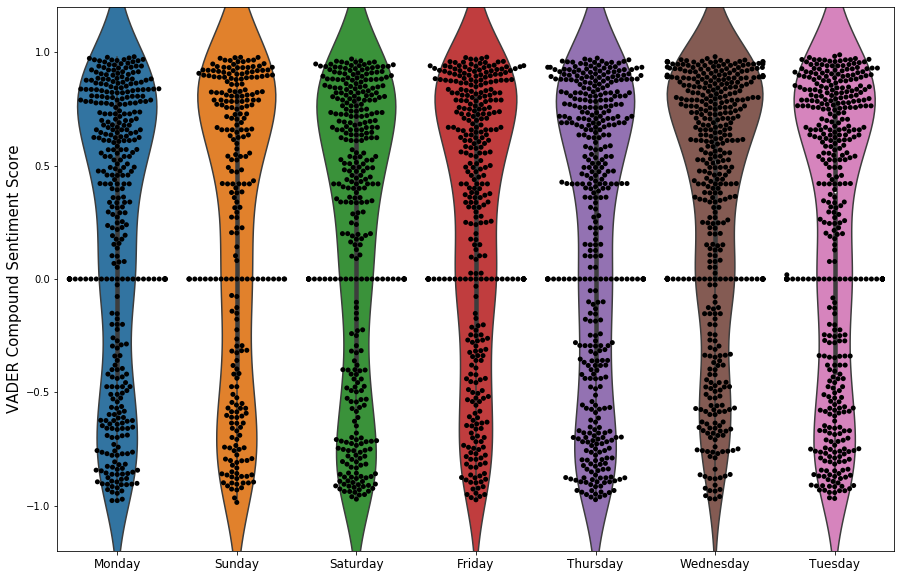

In [149]:
# plot sentiment of tweets according to day of the week
plt.close()
plt.figure(figsize=(15,10))
plt.ylim(-1.2,1.2)
sns.violinplot(x='day_of_week',y='vScore',data=dfRt)
sns.swarmplot(x="day_of_week", y="vScore",data=dfRt, color="black")
plt.xlabel('')
plt.xticks(size=12)
plt.ylabel('VADER Compound Sentiment Score',size=15)
plt.savefig('Season1.png')

In [156]:
#DEPENDENCIES & MONGO STORAGE
import numpy as np
import requests
import pymongo
from pymongo import MongoClient
import os

In [157]:
# Save path to 2009 data set in a variable
data_file = "C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 19\\Project3\\Project3-master\\trump_tweet_data_archive-master\\condensed_2009.json.zip"



In [158]:
# load tweets into a dataframe
df = pd.read_json(data_file)
df.head()

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text
0,2009-12-23 17:38:18,12,6971079756,NaN,False,28,Twitter Web Client,From Donald Trump: Wishing everyone a wonderfu...
1,2009-12-03 19:39:09,6,6312794445,NaN,False,33,Twitter Web Client,Trump International Tower in Chicago ranked 6t...
2,2009-11-26 19:55:38,11,6090839867,NaN,False,13,Twitter Web Client,Wishing you and yours a very Happy and Bountif...
3,2009-11-16 21:06:10,3,5775731054,NaN,False,5,Twitter Web Client,Donald Trump Partners with TV1 on New Reality ...
4,2009-11-02 14:57:56,6,5364614040,NaN,False,7,Twitter Web Client,"--Work has begun, ahead of schedule, to build ..."


In [160]:
# ====== Connection ====== #
# Connection to Mongo
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Connection to the database
db = client.TrumpTweets

# Connection to the collection
collection = db.Tweets2009

In [161]:
# Read the row from data_file to create a dictionary
for _, row in df.iterrows():
   dic = {
       'Date':row["created_at"],
       'StringID':row["id_str"],
       'Text': row["text"],
       'RetweetCount': row["retweet_count"],
       'Source': row["source"]
       
       
   }
   #insert dictionary into mongo
   collection.insert_one(dic)

In [164]:
# Save path to 2010-18 data set in a variable
data_file2010 = "C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 19\\Project3\\Project3-master\\trump_tweet_data_archive-master\\condensed_2010.json.zip"
data_file2011 = "C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 19\\Project3\\Project3-master\\trump_tweet_data_archive-master\\condensed_2011.json.zip"
data_file2012 = "C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 19\\Project3\\Project3-master\\trump_tweet_data_archive-master\\condensed_2012.json.zip"
data_file2013 = "C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 19\\Project3\\Project3-master\\trump_tweet_data_archive-master\\condensed_2013.json.zip"
data_file2014 = "C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 19\\Project3\\Project3-master\\trump_tweet_data_archive-master\\condensed_2014.json.zip"
data_file2015 = "C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 19\\Project3\\Project3-master\\trump_tweet_data_archive-master\\condensed_2015.json.zip"
data_file2016 = "C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 19\\Project3\\Project3-master\\trump_tweet_data_archive-master\\condensed_2016.json.zip"
data_file2017 = "C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 19\\Project3\\Project3-master\\trump_tweet_data_archive-master\\condensed_2017.json.zip"
data_file2018 = "C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 19\\Project3\\Project3-master\\trump_tweet_data_archive-master\\condensed_2018.json.zip"


In [165]:
# load tweets into a dataframe
df2010 = pd.read_json(data_file2010)
df2011 = pd.read_json(data_file2011)
df2012 = pd.read_json(data_file2012)
df2013 = pd.read_json(data_file2013)
df2014 = pd.read_json(data_file2014)
df2015 = pd.read_json(data_file2015)
df2016 = pd.read_json(data_file2016)
df2017 = pd.read_json(data_file2017)
df2018 = pd.read_json(data_file2018)

In [167]:
# ====== Connection ====== #
# Connection to Mongo
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Connection to the database
db = client.TrumpTweets

# Connection to the collection
collection = db.Tweets2010

# Read the row from data_file to create a dictionary
for _, row in df2010.iterrows():
   dic = {
       'Date':row["created_at"],
       'StringID':row["id_str"],
       'Text': row["text"],
       'RetweetCount': row["retweet_count"],
       'Source': row["source"]
       
       
   }
   #insert dictionary into mongo
   collection.insert_one(dic)


In [168]:
# ====== Connection ====== #
# Connection to Mongo
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Connection to the database
db = client.TrumpTweets

# Connection to the collection
collection = db.Tweets2011

# Read the row from data_file to create a dictionary
for _, row in df2011.iterrows():
   dic = {
       'Date':row["created_at"],
       'StringID':row["id_str"],
       'Text': row["text"],
       'RetweetCount': row["retweet_count"],
       'Source': row["source"]
       
       
   }
   #insert dictionary into mongo
   collection.insert_one(dic)

In [169]:
# ====== Connection ====== #
# Connection to Mongo
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Connection to the database
db = client.TrumpTweets

# Connection to the collection
collection = db.Tweets2012

# Read the row from data_file to create a dictionary
for _, row in df2012.iterrows():
   dic = {
       'Date':row["created_at"],
       'StringID':row["id_str"],
       'Text': row["text"],
       'RetweetCount': row["retweet_count"],
       'Source': row["source"]
       
       
   }
   #insert dictionary into mongo
   collection.insert_one(dic)

In [170]:
# ====== Connection ====== #
# Connection to Mongo
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Connection to the database
db = client.TrumpTweets

# Connection to the collection
collection = db.Tweets2013

# Read the row from data_file to create a dictionary
for _, row in df2013.iterrows():
   dic = {
       'Date':row["created_at"],
       'StringID':row["id_str"],
       'Text': row["text"],
       'RetweetCount': row["retweet_count"],
       'Source': row["source"]
       
       
   }
   #insert dictionary into mongo
   collection.insert_one(dic)

In [171]:
# ====== Connection ====== #
# Connection to Mongo
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Connection to the database
db = client.TrumpTweets

# Connection to the collection
collection = db.Tweets2014

# Read the row from data_file to create a dictionary
for _, row in df2014.iterrows():
   dic = {
       'Date':row["created_at"],
       'StringID':row["id_str"],
       'Text': row["text"],
       'RetweetCount': row["retweet_count"],
       'Source': row["source"]
       
       
   }
   #insert dictionary into mongo
   collection.insert_one(dic)

In [172]:
# ====== Connection ====== #
# Connection to Mongo
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Connection to the database
db = client.TrumpTweets

# Connection to the collection
collection = db.Tweets2015

# Read the row from data_file to create a dictionary
for _, row in df2015.iterrows():
   dic = {
       'Date':row["created_at"],
       'StringID':row["id_str"],
       'Text': row["text"],
       'RetweetCount': row["retweet_count"],
       'Source': row["source"]
       
       
   }
   #insert dictionary into mongo
   collection.insert_one(dic)

In [173]:
# ====== Connection ====== #
# Connection to Mongo
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Connection to the database
db = client.TrumpTweets

# Connection to the collection
collection = db.Tweets2016

# Read the row from data_file to create a dictionary
for _, row in df2016.iterrows():
   dic = {
       'Date':row["created_at"],
       'StringID':row["id_str"],
       'Text': row["text"],
       'RetweetCount': row["retweet_count"],
       'Source': row["source"]
       
       
   }
   #insert dictionary into mongo
   collection.insert_one(dic)

In [174]:
# ====== Connection ====== #
# Connection to Mongo
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Connection to the database
db = client.TrumpTweets

# Connection to the collection
collection = db.Tweets2017

# Read the row from data_file to create a dictionary
for _, row in df2017.iterrows():
   dic = {
       'Date':row["created_at"],
       'StringID':row["id_str"],
       'Text': row["text"],
       'RetweetCount': row["retweet_count"],
       'Source': row["source"]
       
       
   }
   #insert dictionary into mongo
   collection.insert_one(dic)

In [175]:
# ====== Connection ====== #
# Connection to Mongo
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Connection to the database
db = client.TrumpTweets

# Connection to the collection
collection = db.Tweets2018

# Read the row from data_file to create a dictionary
for _, row in df2018.iterrows():
   dic = {
       'Date':row["created_at"],
       'StringID':row["id_str"],
       'Text': row["text"],
       'RetweetCount': row["retweet_count"],
       'Source': row["source"]
       
       
   }
   #insert dictionary into mongo
   collection.insert_one(dic)